# Topographical plots

Following https://mikexcohen.com/lecturelets/topoplots/topoplots.html

In [1]:
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mne

from utils import closest_idx, istring_idx, import_eeg_mat

In [2]:
eeg = import_eeg_mat('../data/sampleEEGdata.mat')

## Introduction to topographical plotting

Get cartesian coordinates

In [3]:
elocsY, elocsX = eeg.chanlocsYX.T

Plot electrode locations

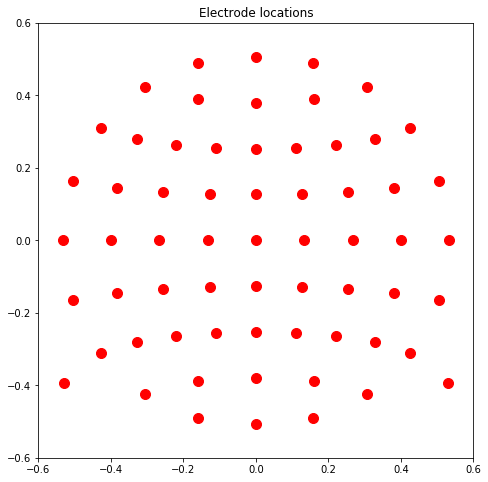

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(elocsY, elocsX, s=100, color='red', marker='o')
ax.set_xlim(-.6, .6)
ax.set_ylim(-.6, .6)
ax.set_aspect('equal')
ax.set_title("Electrode locations");

Define points for interpolation

In [5]:
interp_detail = 100
interpX = np.linspace(elocsX.min() - .2, elocsX.max() + .25, interp_detail)
interpY = np.linspace(elocsY.min(), elocsY.max(), interp_detail)

gridX, gridY = np.meshgrid(interpX, interpY)

Have a look at our interpolation points

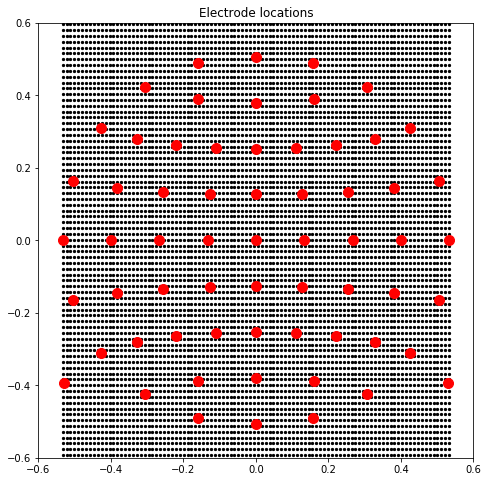

In [6]:
ax.scatter(gridY.flat, gridX.flat, s=20, color='black', marker='.', zorder=-1)
fig

## Extract data and interpolate to 2D grid

Convert time point from ms to index

In [7]:
timepoint_ms = 100
timepoint_idx = closest_idx(eeg.times, timepoint_ms)

Average data over all trials at this timepoint, and interpolate

In [8]:
data = eeg.data[:, timepoint_idx, :].mean(-1)
topodata = scipy.interpolate.griddata(eeg.chanlocsYX, data,
                                      np.array([gridY.flatten(), gridX.flatten()]).T,
                                      method='cubic').reshape(100, 100)

Use different plotting functions

/home/sl/.virtualenvs/mikexcohen-lectures/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  # Remove the CWD from sys.path while we load stuff.
/home/sl/.virtualenvs/mikexcohen-lectures/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


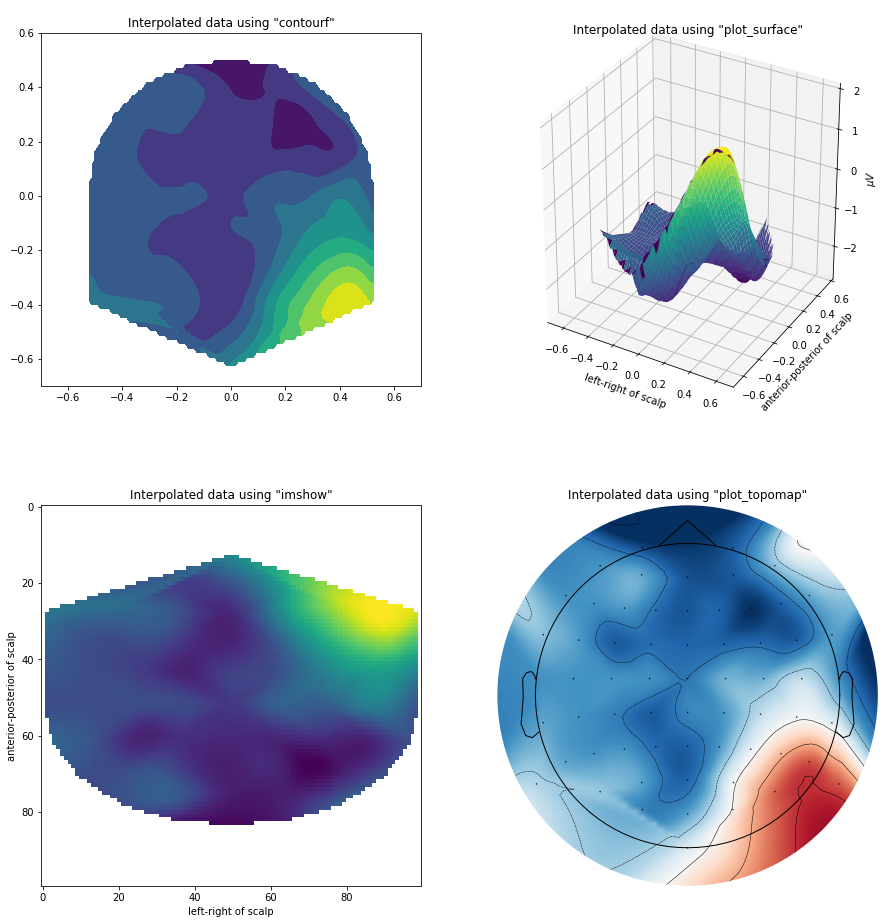

In [9]:
fig = plt.figure(figsize=(15, 15))

ax0 = fig.add_subplot(2, 2, 1)
ax0.contourf(gridY, gridX, topodata)
ax0.set_aspect('equal')
ax0.set(xlim=(-.7, .7), ylim=(-.7, .6), title='Interpolated data using "contourf"')

ax1 = fig.add_subplot(2, 2, 2, projection='3d')
ax1.plot_surface(gridY, gridX, topodata, cmap='viridis',
                 vmin=np.nanmin(topodata), vmax=np.nanmax(topodata))
ax1.set(xlim=(-.7, .7), ylim=(-.7, .6),
        xlabel='left-right of scalp',
        ylabel='anterior-posterior of scalp',
        zlabel=r'$\mu V$',
        title='Interpolated data using "plot_surface"')

ax2 = fig.add_subplot(2, 2, 3)
ax2.imshow(topodata.T, aspect='equal')
ax2.set(xlabel='left-right of scalp',
        ylabel='anterior-posterior of scalp',
        title='Interpolated data using "imshow"')

ax3 = fig.add_subplot(2, 2, 4)
ax3.set_title('Interpolated data using "plot_topomap"')
mne.viz.plot_topomap(data=data,
                     pos=eeg.chanlocsYX,
                     axes=ax3, outlines='skirt');

Finally, a handy way to see the positions of the electrodes

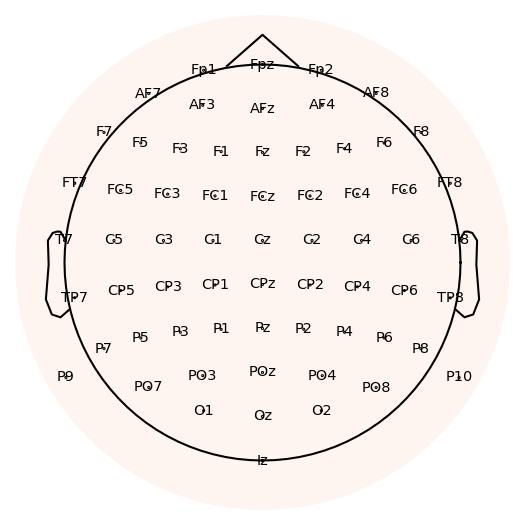

(<matplotlib.image.AxesImage at 0x7f6f0017edd0>, None)

In [10]:
fig, ax = plt.subplots(dpi=150)
mne.viz.plot_topomap(np.zeros(len(eeg.chanlabels)), eeg.chanlocsYX,
                     names=eeg.chanlabels,
                     show_names=True,
                     outlines='skirt', axes=ax)